In [22]:
 #для установки библиотек
! pip3 install seaborn
! pip3 install plotly
! pip3 install ggplot
! pip3 install matplotlib
! pip install tensorflow
! pip3 install keras
! pip install opencv-python

import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

import cv2
import os

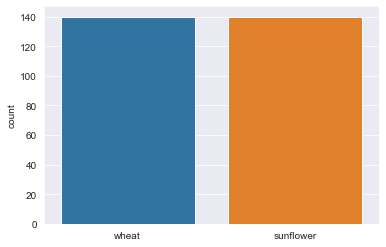

In [29]:
labels = ['wheat', 'sunflower']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

#загрузка картинок
train = get_data(r'D:\DataScience\Seeds\classification\train')
val = get_data(r'D:\DataScience\Seeds\classification\test')

#визуализация количества картинок 
l = []
for i in train:
    if (i[1] == 0):
        l.append("wheat")
    else:
        l.append("sunflower")
sns.set_style('darkgrid')
sns.countplot(l)


Text(0.5, 1.0, 'wheat')

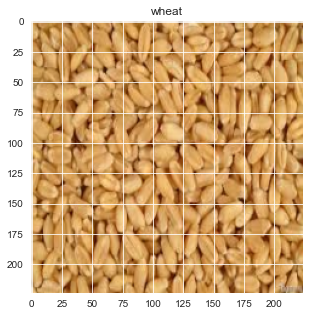

In [30]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'sunflower')

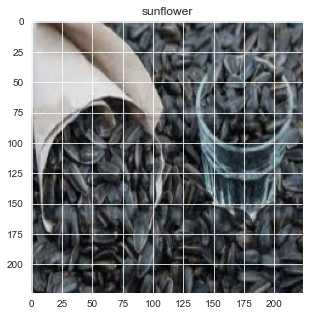

In [31]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])


In [32]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Нормализация
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [33]:
#аугментация
datagen = ImageDataGenerator(
        featurewise_center=False,  # не выводит контур изображения усредняя данные по всему набору.
        samplewise_center=False,  # не выводит контур изображения усредняя данные по элементу.
        featurewise_std_normalization=False,  # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение по всему набору.
        samplewise_std_normalization=False,  # Если True, то делит каждый элемент входного набора данных на сренеквадратическое отклонение этого элемента.
        zca_whitening=False,  # Если True, то применяется ZCA-отбеливание.
        rotation_range = 30,  # Значение (в градусах) для выбора случайного поворота изображения.
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [34]:
#модель CNN с 3 сверточными слоями, за которыми следуют уровни максимального объединения 
#cлой исключения добавляется после 3-й операции maxpool 
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 64)        0

In [36]:
tf.keras.backend.clear_session()

In [37]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [38]:
history = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val))

Epoch 1/100
9/9 [==============================] - 17s 1s/step - loss: 0.6973 - accuracy: 0.4924 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/100
9/9 [==============================] - 10s 1s/step - loss: 0.6812 - accuracy: 0.5950 - val_loss: 0.6887 - val_accuracy: 0.5303
Epoch 3/100
9/9 [==============================] - 10s 1s/step - loss: 0.6926 - accuracy: 0.5382 - val_loss: 0.6814 - val_accuracy: 0.5606
Epoch 4/100
9/9 [==============================] - 10s 1s/step - loss: 0.6861 - accuracy: 0.5428 - val_loss: 0.6748 - val_accuracy: 0.5606
Epoch 5/100
9/9 [==============================] - 10s 1s/step - loss: 0.6742 - accuracy: 0.6044 - val_loss: 0.6681 - val_accuracy: 0.5758
Epoch 6/100
9/9 [==============================] - 10s 1s/step - loss: 0.6578 - accuracy: 0.6800 - val_loss: 0.6612 - val_accuracy: 0.5758
Epoch 7/100
9/9 [==============================] - 10s 1s/step - loss: 0.6661 - accuracy: 0.6215 - val_loss: 0.6546 - val_accuracy: 0.6212
Epoch 8/100
9/9 [==========

9/9 [==============================] - 10s 1s/step - loss: 0.3112 - accuracy: 0.9245 - val_loss: 0.2850 - val_accuracy: 0.9848
Epoch 60/100
9/9 [==============================] - 10s 1s/step - loss: 0.3126 - accuracy: 0.9178 - val_loss: 0.2801 - val_accuracy: 0.9848
Epoch 61/100
9/9 [==============================] - 10s 1s/step - loss: 0.3097 - accuracy: 0.9208 - val_loss: 0.2758 - val_accuracy: 0.9848
Epoch 62/100
9/9 [==============================] - 10s 1s/step - loss: 0.3076 - accuracy: 0.9430 - val_loss: 0.2713 - val_accuracy: 0.9848
Epoch 63/100
9/9 [==============================] - 10s 1s/step - loss: 0.3133 - accuracy: 0.9273 - val_loss: 0.2673 - val_accuracy: 0.9848
Epoch 64/100
9/9 [==============================] - 10s 1s/step - loss: 0.2844 - accuracy: 0.9601 - val_loss: 0.2628 - val_accuracy: 0.9848
Epoch 65/100
9/9 [==============================] - 10s 1s/step - loss: 0.3179 - accuracy: 0.9100 - val_loss: 0.2588 - val_accuracy: 0.9848
Epoch 66/100
9/9 [===============

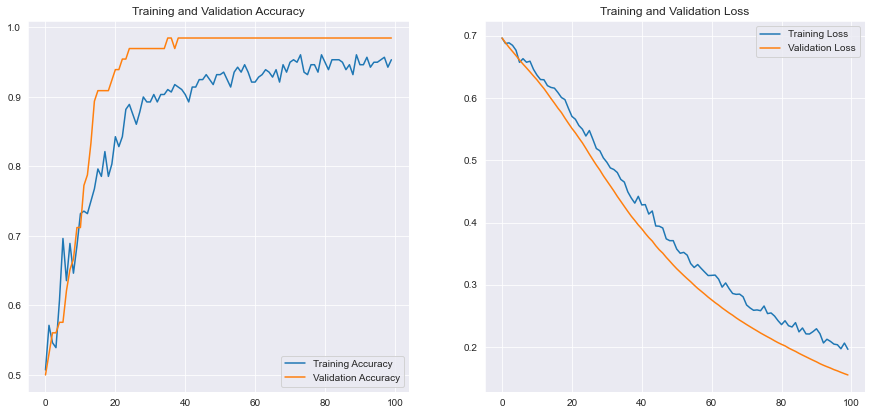

In [41]:
#оценка результата
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [42]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Wheat (Class 0)','Sunflower (Class 1)']))

C:\Users\Dasha\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                     precision    recall  f1-score   support

    Wheat (Class 0)       0.97      1.00      0.99        33
Sunflower (Class 1)       1.00      0.97      0.98        33

           accuracy                           0.98        66
          macro avg       0.99      0.98      0.98        66
       weighted avg       0.99      0.98      0.98        66

